In [1]:
import pandas as pd

##### 1. Series

In [ ]:
# 1. Series(클래스) - 1차원
s1 = pd.Series() # 생성자, 빈객체(1차원, 시리즈)를 생성
s2 = pd.Series([1,2,3,4,5]) # 인덱스설정하지 않은 시리즈
s3 = pd.Series([1,2,3,4,5], index=['서울','부산','대구','대전','광주',])
print(s2)
print(s3)
# print(dir(s))

In [ ]:
# 시리즈요소에 접근하기 - 인덱싱
print(s2[1])
print(s3['부산'], '또는', s3.부산, '또는', s3[1])

In [ ]:
# 시리즈에 대한 정보
print(s2.index)
print(s3.index)
print(s2.values)
print(s3.values)

In [ ]:
# 인덱스에 이름 부여하기
s3.name = '인구수'
s3.index.name = '도시'
# print(dir(s2))

In [ ]:
서울    1
부산    2
대구    3
대전    4
광주    5
dtype: int64
    
서울    1
부산    2
대구    3
대전    4
광주    5
Name: 인구수, dtype: int64    

In [ ]:
# 배열인덱싱을 사용
s3[['서울', '부산', '대전']]

In [ ]:
# 배열인덱싱 - 조건
s3[(s3>2) & (s3<5)]

In [ ]:
# 슬라이싱
print(s3[1:])
print(s3[1:3])
print(s3["부산":"광주"]) # 인덱스(명)이 있는 경우


In [ ]:
# 시리즈객체는 라벨값에 의해 인덱싱이 가능하기 때문에 실질적으로는 dict형태로
# 접근하는 것 처럼 key(index)로 접근할 수가 있다.
# 즉 dict자료형과 유사하다고 볼 수 있다. 따라서 dict에서 제공하는 in/not in, items, 
# for 등의 작업을 할 수가 있다.

print("서울" in s3)
print("시카고" in s3)
print(s3.items)
print()

for k, v in s3.items():
    print(f'{k} = {v}')

In [ ]:
# dict와 유사하기 때문에 dict로 Series를 생성하기
s4 = pd.Series({'서울':1,'부산':2,'대구':3,'인천':3,})

for k, v in s4.items():
    print(f'{k} = {v}')

In [ ]:
# 시리즈객체의 연산
print(s4 - s3)
ds = s4 - s3

In [ ]:
print(ds.notnull())
print(ds[ds.notnull()])

In [ ]:
# 시리즈객체의 수정
s4.서울 = 2500
s4['부산'] = 1200
s4[2] = 800
s4

In [ ]:
# 시리즈객체의 삭제 del
del s4['인천']
s4

##### 2. DataFrame

* 2차원데이터
* 2차원이기 때문에 `행인덱스, row index`와 `열인덱스 column index`를 정의할 수 있다.

In [ ]:
data = {
    "2015":[1,2,3],
    "2016":[4,5,6],
    "2017":[7,8,9],
    "2018":[1,2,3],
}
print(type(data))

# df을 생성할 때는 열의 갯수가 동일해야 한다.
df = pd.DataFrame(data)
df

In [ ]:
df.columns = ['2015년','2016년','2017년', '2018년']
df

In [ ]:
# 행의 인덱스를 설정하려면 행과 인덱스갯수가 동일해야 한다.
df.index = ['서울','부산','대구']
df

In [ ]:
# df의 정보조회
df.info()
print(df.index)
print(df.columns)
print(df.values)
print(type(df.index), type(df.columns))

In [ ]:
# 인덱스 및 컬럼명 설정하기
df.index.name = '도시'
df.columns.name = '인구수'
df

In [ ]:
# 피봇 T 즉, 전치(transpose)
df.T

##### df의 수정, 추가, 삭제

In [ ]:
# 열추가
df['2019년'] = 10
df

In [ ]:
# 수정하기
df['2019년'] = 20
df

In [ ]:
# 삭제하기
del df['2017년']
df

In [ ]:
# 열의 인덱싱 - dict와 유사
display(type(df['2019년']), df['2019년']) # 한개의 열
display(df[['2016년', '2019년']])# 여러개 열
display(type(df[['2019년']]), df[['2019년']]) 

In [ ]:
# 정수형인덱스 df 접근
import numpy as np
df2 = pd.DataFrame(np.arange(12).reshape(3,4))
df2

In [ ]:
df2[2]
df2[[1,3]]

##### 행인덱싱

* df을 행단위 인덱싱을 하려면 `항상 슬라이싱`으로 해야 한다.
* 인덱스가 문자라면 라벨슬라이싱, 인덱스가 정수라면 정수인덱싱

In [ ]:
df[:]

In [ ]:
df[::]

In [ ]:
df[::2]

In [ ]:
df[1:3]
df['부산':'대구']

In [ ]:
# 개별인덱싱 df[열][행]
df['2016년']
df['2016년']['부산']

##### df 입출력 하기

* csv, excel, html, json, hdf5, sql, sas, stata

In [ ]:
%%writefile sample.csv
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

In [ ]:
df = pd.read_csv('sample.csv')
df

In [ ]:
%%writefile sample1.csv
1, 1.11, one
2, 2.22, two
3, 3.33, three

In [ ]:
# names속성이 없다면 1행이 열의 제목이 된다.
df = pd.read_csv('sample1.csv', names=['c1', 'c2', 'c3'])
df

In [ ]:
# 인덱스 지정하기
df = pd.read_csv('sample1.csv', names=['c1', 'c2', 'c3'])
df.index = ['A', 'B', 'C']
df

In [ ]:
# 특정의 열을 index로 지정할 경우
df = pd.read_csv('sample.csv', index_col='c1')
df

In [ ]:
%%writefile sample3.csv
c1 c2 c3
1 1.11 one
2 2.22 two
3 3.33 three

In [ ]:
# sep가 콤마가 아닌 경우
df = pd.read_csv('sample3.csv', sep="\s+")
df

In [ ]:
%%writefile sample4.csv
1번째라인 설명
2번쨰라인 설명
c1 c2 c3
1 1.11 one
2 2.22 two
3 3.33 three

In [ ]:
df = pd.read_csv('sample4.csv', sep="\s+", skiprows=2)
df

df = pd.read_csv('sample4.csv', sep="\s+", skiprows=[0,1])
df

In [ ]:
# csv파일출력 : to_csv
df.to_csv('./sample5.csv')
df.to_csv('./sample6.csv', sep='|')

In [2]:
# 인터넷상의 csv파일 입력
df = pd.read_csv("https://raw.githubusercontent.com/datascienceschool/docker_rpython/master/data/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


###### 인터넷상에서 데이터베이스 자료

* pandas_datareader 패키지의 `DataReader`를 사용하면 인터넷사이트의 자료를 바로 pandas로 읽을 수가 있다.
* https://pandas-datareader.readthedocs.io/en/latest/index.html
* datareader로 읽은 자료의 날짜들은 datetime패키지 or 문자열로 바로 사용가능
* 일부 인터넷사이트는 회원가입과 유료회원으로 등록해야만 된다.
    * FRED
    * OECD
    * NASDAQ
    ...

In [4]:
!pip install pandas-datareader
!pip show pandas-datareader

Defaulting to user installation because normal site-packages is not writeable
Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: C:\Users\EZEN\AppData\Roaming\Python\Python311\site-packages
Requires: lxml, pandas, requests
Required-by: 


In [7]:
# FRED 데이터베이스에는 '미국국가GDP', '소비자가격지수'...
import pandas_datareader as pdr
import datetime

dt_start = datetime.datetime(2010,1, 1)
dt_end = datetime.datetime(2022,12, 31)

gdp = pdr.get_data_fred('GDP', dt_start, dt_end)
gdp.tail()

,GDP
DATE,
2021-10-01,24654.603
2022-01-01,25029.116
2022-04-01,25544.273
2022-07-01,25994.639
2022-10-01,26408.405


<Axes: xlabel='DATE'>

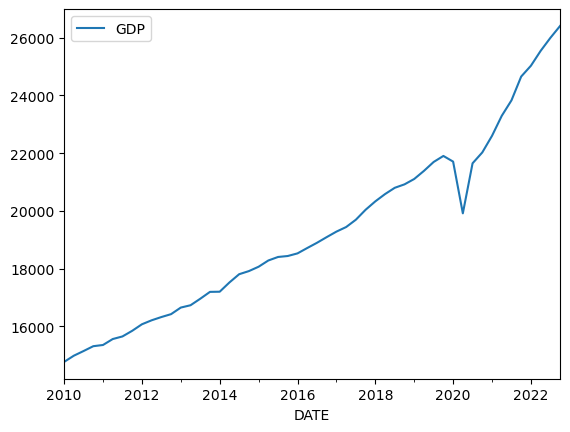

In [11]:
gdp.plot()

In [13]:
# 소비자가격지수
# 모든항목 포함 지수 : CPIAUCSL
# 식료품과 연로를 제외한 지수 : CPILFESL
inflation = pdr.get_data_fred(['CPIAUCSL', 'CPILFESL'], dt_start, dt_end)
inflation.tail()

,CPIAUCSL,CPILFESL
DATE,,
2022-08-01,295.320,296.639
2022-09-01,296.539,298.339
2022-10-01,297.987,299.333
2022-11-01,298.598,300.261
2022-12-01,298.990,301.460


<Axes: xlabel='DATE'>

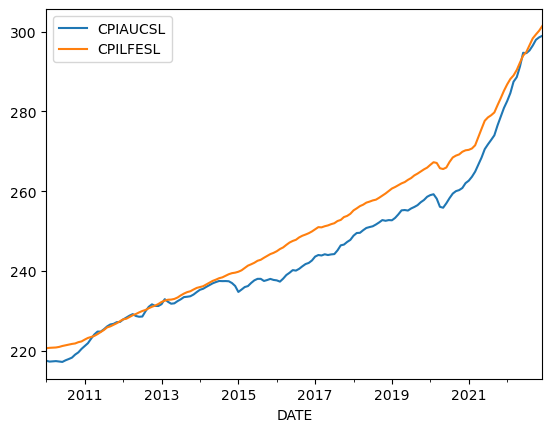

In [16]:
inflation.plot()

##### 데이터프레임 인덱싱

* pandas에서는 numpy의 (행인덱스, 열인덱)형식의 2차원 인덱싱을 지원하기 위해서 인덱서라는 기능을 제공한다.
  1. `loc`  : 라벨값을 기준으로 2차원 인덱싱
     - `df.loc[행인덱스값]` or `df.loc[행인덱스, 열인덱스]`
  1. `iloc` : 정수를 기분으로 2차원인덱싱

In [19]:
import numpy as np
df = pd.DataFrame(np.arange(10, 22).reshape(3,4)
                  , index=['A', 'B', 'C'], columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
A,10,11,12,13
B,14,15,16,17
C,18,19,20,21


In [21]:
df.loc['A']  # A행 값 추출

a    10
b    11
c    12
d    13
Name: A, dtype: int32

In [26]:
# loc사용 vs 미사용 
df.loc[:]
df.loc['B':'C'] # loc를 사용
df['B':'C']     # loc를 미사용 
# df[["B", "C"]]  # 슬라이싱이 아닌 경우 loc함수를 사용하지 않으면 에러
df.loc[["B", "C"]] 

,a,b,c,d
B,14,15,16,17
C,18,19,20,21


In [37]:
# 블리언인덱싱
print(list(df.a > 15))
df.loc[df.a > 15] # a의 열의 값이 15보다 큰 행만 추출

def select_rows(df, num):
    return df > num

df.loc[select_rows(df.b, 15)]

[False, False, True]


,a,b,c,d
C,18,19,20,21


* loc함수 정리

|인덱싱값|가능|결과|자료형|기타사항|
|:---:|:----:|:----:|:-----:|:------------|
|행인덱스값(정수)|O|행|Series||
|행인덱스값(정수)/슬라이싱|O|행|DataFrame|loc가 없는 경우와 동일|
|행인덱스값(정수)/list|O|행|DataFrame||
|블리언시리즈|O|행|DataFrame|시리즈의 인덱스가 df의 행인덱스와 동일|
|블리언시리즈를 반환하는 함수|O|행|DataFrame||
|열라벨|X|||loc가 없는 경우에만 사용할 수 있다.|
|열라벨리스트|X|||loc가 없는 경우에만 사용할 수 있다.|


In [55]:
# 인덱싱을 값을 행과 열을 받는 경우 : df[:,:]
display(df)
display(df.loc["A", "a"])
display(df.loc["B", "d"])
display(df.loc["B", 'b':'d'])
display(df.loc["B", :])

# A행과 B행에서 b, d열값만 추출하기
display(df.loc["A":"B", ["b",'d']])

# A행과 C행에서 b, d열값만 추출하기
display(df.loc[["A","C"], ["b",'d']])

# a열의 값이 10보다 큰행에서 c,d를 추출
display(df.loc[df.a > 10,'c':'d'])
display(df.loc[df.a > 10,['c','d']])

,a,b,c,d
A,10,11,12,13
B,14,15,16,17
C,18,19,20,21


10

17

b    15
c    16
d    17
Name: B, dtype: int32

a    14
b    15
c    16
d    17
Name: B, dtype: int32

,b,d
A,11,13
B,15,17


,b,d
A,11,13
C,19,21


,c,d
B,16,17
C,20,21


,c,d
B,16,17
C,20,21


In [59]:
df

,a,b,c,d
A,10,11,12,13
B,14,15,16,17
C,18,19,20,21


In [62]:
# iloc : 행, 열인덱서가 정의되지 않았을 경우에 사용
display(df.iloc[0,1]) # 첫번째행의 2번째열
display(df.iloc[:2,2])    # 첫행~2번째행의 3번쨰을 추출
display(df.iloc[-1:,-1:])

11

A    12
B    16
Name: c, dtype: int32

,d
C,21


###### 데이터조작

In [66]:
s = pd.Series(range(1,11))
s[3] = np.nan
print(list(s))

[1.0, 2.0, 3.0, nan, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


In [67]:
print(len(s), s.count())

10 9


In [99]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(5, size=(4,4)),dtype=float)
df.iloc[2,3] = np.nan
display(df)
print(len(df), '\n-----\n', df.count())

,0,1,2,3
0,3.0,4.0,2.0,4.0
1,4.0,1.0,2.0,2.0
2,2.0,4.0,3.0,NaN
3,4.0,1.0,3.0,1.0


4 
-----
 0    4
1    4
2    4
3    3
dtype: int64


In [75]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [93]:
# value_counts() : 카테고리별 갯수
display(titanic.iloc[:,0].value_counts()) # 생존 vs 사망
display(titanic.loc[:,'pclass'].value_counts())

survived
0    549
1    342
Name: count, dtype: int64

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [97]:
# 정렬 - 인덱스
display(titanic.loc[:,'pclass'].value_counts().sort_index())
display(titanic.loc[:,'pclass'].value_counts().sort_index(ascending=False))

# 정렬 - 값
display(titanic.loc[:,'pclass'].value_counts().sort_values())

pclass
1    216
2    184
3    491
Name: count, dtype: int64

pclass
3    491
2    184
1    216
Name: count, dtype: int64

pclass
2    184
1    216
3    491
Name: count, dtype: int64

In [103]:
display(df)
display(df.sort_values(by=1)) # 2번쨰열의 값으로 정렬
display(df.sort_values(by=[1,2])) # 2번째/3번째 값으로 정렬

,0,1,2,3
0,3.0,4.0,2.0,4.0
1,4.0,1.0,2.0,2.0
2,2.0,4.0,3.0,NaN
3,4.0,1.0,3.0,1.0


,0,1,2,3
1,4.0,1.0,2.0,2.0
3,4.0,1.0,3.0,1.0
0,3.0,4.0,2.0,4.0
2,2.0,4.0,3.0,NaN


,0,1,2,3
1,4.0,1.0,2.0,2.0
3,4.0,1.0,3.0,1.0
0,3.0,4.0,2.0,4.0
2,2.0,4.0,3.0,NaN


In [104]:
# 행/열의 합계
np.random.seed(42)
df1 = pd.DataFrame(np.random.randint(10, size=(4,8)))
df1

,0,1,2,3,4,5,6,7
0,6,3,7,4,6,9,2,6
1,7,4,3,7,7,2,5,4
2,1,7,5,1,4,0,9,5
3,8,0,9,2,6,3,8,2


In [110]:
# 합계
df1.sum()       # 열의 합계
df1.sum(axis=0) # 열의 합계
df1.sum(axis=1) # 행의 합계

df1['RowSum'] = df1.sum(axis=1) # 열추가
df1

df1.loc["ColSum", :] = df1.sum(axis=0) # 행추가
df1

,0,1,2,3,4,5,6,7,RowSum
0,6.0,3.0,7.0,4.0,6.0,9.0,2.0,6.0,86.0
1,7.0,4.0,3.0,7.0,7.0,2.0,5.0,4.0,78.0
2,1.0,7.0,5.0,1.0,4.0,0.0,9.0,5.0,64.0
3,8.0,0.0,9.0,2.0,6.0,3.0,8.0,2.0,76.0
ColSum,22.0,14.0,24.0,14.0,23.0,14.0,24.0,17.0,304.0


* 연습문제 : https://www.datamanim.com/dataset/99_pandas/pandasMain.html

In [137]:
# apply함수
df3 = pd.DataFrame({
    'A': [1,3,4,3,4],
    'B': [2,3,1,2,3],
    'C': [1,5,2,4,4]
})
df3

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [131]:
# apply(함수)는 행이나 열단위로 더 복잡한 처리를 할 경우 사용
df3.apply(lambda x:x.max() - x.min())  # 기본값 axis=0
df3.apply(lambda x:x.max() - x.min(),  axis=0) # 열기준 최대값 - 최소값
df3.apply(lambda x:x.max() - x.min(),  axis=1) # 행기준 최대값 - 최소값

0    1
1    2
2    3
3    2
4    1
dtype: int64

In [138]:
# 열기준(axis=0 or 생략)으로 각 값이 얼마나 사용됬는지 출력(value_counts)
df3.apply(pd.value_counts)

,A,B,C
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [133]:
# 실습. titanic의 승객의 나이(age) > 20면 adult 아니면 child로 구분되는
# adult_child열을 추가
display(titanic.head())
titanic['adult_child'] = \
    titanic.apply(lambda row: "성인" if row.age > 20 else "미성년", axis=1)
display(titanic.tail())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult_child
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,성인
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,성인
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,성인
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,성인
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,성인


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult_child
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,성인
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,미성년
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,미성년
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,성인
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,성인


In [141]:
# NaN값의 처리 fillna()함수
df3 = pd.DataFrame({
    'A': [1,3,4,3,4],
    'B': [2,3,1,2,3],
    'C': [1,5,2,4,4]
})

df3.apply(pd.value_counts).fillna(0.1).astype(int)

,A,B,C
1,1,1,1
2,0,2,1
3,2,2,0
4,2,0,2
5,0,0,1


In [160]:
# df의 값을 카테고리값으로 변환
# 1. 실수값을 카테고리값을 변환
# 1) cut  : 실수값의 경계선으로 지정
# 2) qcut : 갯수가 동일한 구간으로 변환
ages = [0,20,10,21,23,37,31,61,20,41,32,101]

# cut - 구간경계
bins = [1, 20, 30, 50,70,100]
labels = ['미성년자', '청년', '중년', '장년', '노년']
categories = pd.cut(ages, bins, labels=labels)
print(type(categories))
categories.categories
categories.codes

df4 = pd.DataFrame(ages, columns=['ages'])
df4['age_cat'] = pd.cut(df4.ages, bins, labels=labels)
df4

<class 'pandas.core.arrays.categorical.Categorical'>


,ages,age_cat
0,0,NaN
1,20,미성년자
2,10,미성년자
3,21,청년
4,23,청년
5,37,중년
6,31,중년
7,61,장년
8,20,미성년자
9,41,중년


In [167]:
# qcut - 구간경계선을 나누지 않고 데이터갯수가 같도록 지정한 구간수 분류
data = np.random.randn(1000)
categories = pd.qcut(data, 4, labels=['1Q', '2Q', '3Q', '4Q'])
categories

pd.value_counts(categories)

1Q    250
2Q    250
3Q    250
4Q    250
Name: count, dtype: int64

In [169]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult_child
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,성인
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,성인
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,성인
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,성인
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,성인


In [181]:
# 실습. 타이타닉호의 승객에 대해 나이와 성별에 의한 카테고리 열인 
# category3 열을 만들어라. category3 카테고리는 다음과 같이 정의된다.
# 20살 미만이면 성별에 관계없이 “미성년자”라고 한다.
# 20살 이상이면 나이에 따라 “청년”, “중년”, “장년”, “노년”을 구분하고 
# 그 뒤에 성별을 나타내는 “남성”, “여성”을 붙인다.
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [190]:
bins = [1, 20, 30, 50,70,100]
labels = ['미성년자', '청년', '중년', '장년', '노년']

titanic['category3'] = np.nan
ages = pd.cut(titanic.age, bins, labels=labels)
titanic['나이분류'] = ages

titanic['category3'] = titanic.apply(\
                        lambda row: '미성년자' if row.age < 20 else '성년', axis=1)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category3,나이분류
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,성년,청년
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,성년,중년
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,성년,청년
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,성년,중년
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,성년,중년


##### df의 인덱스조작

In [203]:
# 1. df인덱스설정 및 제거
# 1) set_index  : 기존행의 인덱스를 제거하고 데이터열중 하나를 인덱스로 설정
# 2) reset_index : 기존행의 인덱스를 젝학 인덱스를 데이터열로 추가
np.random.seed(42)
df1 = pd.DataFrame(np.vstack([list('ABCDE')
                              , np.round(np.random.rand(3,5), 2)]).T
                  , columns=['C1','C2','C3','C4'])
df1

,C1,C2,C3,C4
0,A,0.37,0.16,0.02
1,B,0.95,0.06,0.97
2,C,0.73,0.87,0.83
3,D,0.6,0.6,0.21
4,E,0.16,0.71,0.18


In [204]:
# C1인 열을 인덱스로 설정
df2 = df1.set_index('C1')
df2

,C2,C3,C4
C1,,,
A,0.37,0.16,0.02
B,0.95,0.06,0.97
C,0.73,0.87,0.83
D,0.6,0.6,0.21
E,0.16,0.71,0.18


In [205]:
# 기존인덱스는 제거되고 새로운 인덱스가 추가
df2 = df1.set_index('C2')
df2

,C1,C3,C4
C2,,,
0.37,A,0.16,0.02
0.95,B,0.06,0.97
0.73,C,0.87,0.83
0.6,D,0.6,0.21
0.16,E,0.71,0.18


In [201]:
# 인덱스를 reset(1)
df2 = df2.reset_index()
df2

,C2,C1,C3,C4
0,0.37,A,0.16,0.02
1,0.95,B,0.06,0.97
2,0.73,C,0.87,0.83
3,0.6,D,0.6,0.21
4,0.16,E,0.71,0.18


In [206]:
# 인덱스를 reset(2) - 기존인덱스를 제거
df2 = df2.reset_index(drop=True)
df2

,C1,C3,C4
0,A,0.16,0.02
1,B,0.06,0.97
2,C,0.87,0.83
3,D,0.6,0.21
4,E,0.71,0.18


In [207]:
# 다중인덱스 - 열
np.random.seed(42)
df3 = pd.DataFrame(np.vstack([list('ABCDE')
                              , np.round(np.random.rand(3,5), 2)]).T
                  , columns=[["A", 'A', 'B', 'B'], ['C1','C2','C3','C4']])
df3

A           B      
  C1    C2    C3    C4
0  A  0.37  0.16  0.02
1  B  0.95  0.06  0.97
2  C  0.73  0.87  0.83
3  D   0.6   0.6  0.21
4  E  0.16  0.71  0.18

In [208]:
# 다중인덱스의 이름을 설정하면 좀 더 편리하게 사요할 수 있다.
# 열의 이름을 지정 : columns.name속성을 설정
df3.columns.names = ['ColIdx1', 'ColIdx2'] 
df3

ColIdx1  A           B      
ColIdx2 C1    C2    C3    C4
0        A  0.37  0.16  0.02
1        B  0.95  0.06  0.97
2        C  0.73  0.87  0.83
3        D   0.6   0.6  0.21
4        E  0.16  0.71  0.18

In [246]:
# 다중인엑스 - 행
np.random.seed(42)
df4 = pd.DataFrame(np.round(np.random.rand(6, 4), 2)
                  , index =[['M','M','M','F','F','F']
                           ,['id_' + str(i+1) for i in range(3)] * 2]
                  , columns=[["A", 'A', 'B', 'B'], ['C1','C2','C3','C4']])

# 행인덱스와 열인덱스설정
df4.columns.names = ["ColIdx1", 'ColIdx2']
df4.index.names = ["RowIdx1", 'RowIdx2']
df4

ColIdx1             A           B      
ColIdx2            C1    C2    C3    C4
RowIdx1 RowIdx2                        
M       id_1     0.37  0.95  0.73  0.60
        id_2     0.16  0.16  0.06  0.87
        id_3     0.60  0.71  0.02  0.97
F       id_1     0.83  0.21  0.18  0.18
        id_2     0.30  0.52  0.43  0.29
        id_3     0.61  0.14  0.29  0.37

In [218]:
# 행인덱스와 열인덱스를 교환하기
# stack(열인덱스 -> 행인덱스), unstack(행인덱스 -> 열인덱스)
df4.stack("ColIdx1")

ColIdx2                    C1    C2    C3    C4
RowIdx1 RowIdx2 ColIdx1                        
M       id_1    A        0.37  0.95   NaN   NaN
                B         NaN   NaN  0.73  0.60
        id_2    A        0.16  0.16   NaN   NaN
                B         NaN   NaN  0.06  0.87
        id_3    A        0.60  0.71   NaN   NaN
                B         NaN   NaN  0.02  0.97
F       id_1    A        0.83  0.21   NaN   NaN
                B         NaN   NaN  0.18  0.18
        id_2    A        0.30  0.52   NaN   NaN
                B         NaN   NaN  0.43  0.29
        id_3    A        0.61  0.14   NaN   NaN
                B         NaN   NaN  0.29  0.37

In [223]:
df4.stack(1)

ColIdx1                     A     B
RowIdx1 RowIdx2 ColIdx2            
M       id_1    C1       0.37   NaN
                C2       0.95   NaN
                C3        NaN  0.73
                C4        NaN  0.60
        id_2    C1       0.16   NaN
                C2       0.16   NaN
                C3        NaN  0.06
                C4        NaN  0.87
        id_3    C1       0.60   NaN
                C2       0.71   NaN
                C3        NaN  0.02
                C4        NaN  0.97
F       id_1    C1       0.83   NaN
                C2       0.21   NaN
                C3        NaN  0.18
                C4        NaN  0.18
        id_2    C1       0.30   NaN
                C2       0.52   NaN
                C3        NaN  0.43
                C4        NaN  0.29
        id_3    C1       0.61   NaN
                C2       0.14   NaN
                C3        NaN  0.29
                C4        NaN  0.37

In [225]:
df4.unstack('RowIdx2')

ColIdx1     A                                   B                          \
ColIdx2    C1                C2                C3                C4         
RowIdx2  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2   
RowIdx1                                                                     
F        0.83  0.30  0.61  0.21  0.52  0.14  0.18  0.43  0.29  0.18  0.29   
M        0.37  0.16  0.60  0.95  0.16  0.71  0.73  0.06  0.02  0.60  0.87   

ColIdx1        
ColIdx2        
RowIdx2  id_3  
RowIdx1        
F        0.37  
M        0.97

In [226]:
df4.unstack(0)

ColIdx1     A                       B                  
ColIdx2    C1          C2          C3          C4      
RowIdx1     F     M     F     M     F     M     F     M
RowIdx2                                                
id_1     0.83  0.37  0.21  0.95  0.18  0.73  0.18  0.60
id_2     0.30  0.16  0.52  0.16  0.43  0.06  0.29  0.87
id_3     0.61  0.60  0.14  0.71  0.29  0.02  0.37  0.97

In [229]:
# 다중인덱스 df의 인덱싱?
df5 = pd.DataFrame(np.round(np.random.rand(5, 4), 2)
                 , columns=[["A", 'A', 'B', 'B'], ['C1','C2','C1','C2']])
df5

A           B      
     C1    C2    C1    C2
0  0.26  0.66  0.31  0.52
1  0.55  0.18  0.97  0.78
2  0.94  0.89  0.60  0.92
3  0.09  0.20  0.05  0.33
4  0.39  0.27  0.83  0.36

In [233]:
# B.C1을 인덱싱 - 다중인덱싱은 소괄호 구분, 즉 tuple로 정의
df5[('B', 'C1')]

# B.C1 첫 번째 값을 수정
df5.loc[0,('B', 'C1')] = 100
df5

A             B      
     C1    C2      C1    C2
0  0.26  0.66  100.00  0.52
1  0.55  0.18    0.97  0.78
2  0.94  0.89    0.60  0.92
3  0.09  0.20    0.05  0.33
4  0.39  0.27    0.83  0.36

In [235]:
# 주의 사항 iloc는 tuple형태의 다중인덱스를 사용할 수 없다.
# B.C1의 첫 번째값을 추출
df5.iloc[0, 2]

100.0

In [239]:
# 다중행,다중열인덱스의 인덱싱하기
# M.id_1, A.C1의 값 즉 0.37 추출하기
df4.loc[('M', 'id_1'), ('A', 'C1')]
df4.loc[:, ('A', 'C1')]

df4.loc[('M', 'id_1'), :]

ColIdx1  ColIdx2
A        C1         0.37
         C2         0.95
B        C3         0.73
         C4         0.60
Name: (M, id_1), dtype: float64

In [240]:
df4

ColIdx1             A           B      
ColIdx2            C1    C2    C3    C4
RowIdx1 RowIdx2                        
M       id_1     0.37  0.95  0.73  0.60
        id_2     0.16  0.16  0.06  0.87
        id_3     0.60  0.71  0.02  0.97
F       id_1     0.83  0.21  0.18  0.18
        id_2     0.30  0.52  0.43  0.29
        id_3     0.61  0.14  0.29  0.37

In [247]:
# 열의 합계후 행추가하기
df4.loc[('Total', '합계'), :] = df4.sum()
df4

ColIdx1             A           B      
ColIdx2            C1    C2    C3    C4
RowIdx1 RowIdx2                        
M       id_1     0.37  0.95  0.73  0.60
        id_2     0.16  0.16  0.06  0.87
        id_3     0.60  0.71  0.02  0.97
F       id_1     0.83  0.21  0.18  0.18
        id_2     0.30  0.52  0.43  0.29
        id_3     0.61  0.14  0.29  0.37
Total   합계       2.87  2.69  1.71  3.28

In [248]:
df4.loc['M']

ColIdx1     A           B      
ColIdx2    C1    C2    C3    C4
RowIdx2                        
id_1     0.37  0.95  0.73  0.60
id_2     0.16  0.16  0.06  0.87
id_3     0.60  0.71  0.02  0.97

##### merge함수를 사용한 df 병합

In [250]:
%reset -f

In [251]:
import numpy as np
import pandas as pd

In [254]:
df1 = pd.DataFrame({
    '고객번호': [1001,1002,1003,1004,1005,1006,1007],
    '고객이름': ['손흥민', '이강인', '김민재', '이재성'
               , '황희찬', '황인범', '황의조']
})
df1

,고객번호,고객이름
0,1001,손흥민
1,1002,이강인
2,1003,김민재
3,1004,이재성
4,1005,황희찬
5,1006,황인범
6,1007,황의조


In [255]:
df2 = pd.DataFrame({
    '고객번호': [1001,1001,1005,1006,1008,1001],
    '고객예금': [10000,20000,15000,5000,100000,3000]
})
df2

,고객번호,고객예금
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,3000


In [256]:
# merge함수를 이용하면 고객번호열을 기준으로 데이터를 merge
# 기본적으로 양쪽 df에 모두 키가 존재하는 경우 inner join 방식
pd.merge(df1, df2)

,고객번호,고객이름,고객예금
0,1001,손흥민,10000
1,1001,손흥민,20000
2,1001,손흥민,3000
3,1005,황희찬,15000
4,1006,황인범,5000


In [258]:
pd.merge(df1, df2, how='outer')

,고객번호,고객이름,고객예금
0,1001,손흥민,10000.0
1,1001,손흥민,20000.0
2,1001,손흥민,3000.0
3,1002,이강인,NaN
4,1003,김민재,NaN
5,1004,이재성,NaN
6,1005,황희찬,15000.0
7,1006,황인범,5000.0
8,1007,황의조,NaN
9,1008,NaN,100000.0


In [259]:
pd.merge(df1, df2, how='left')

,고객번호,고객이름,고객예금
0,1001,손흥민,10000.0
1,1001,손흥민,20000.0
2,1001,손흥민,3000.0
3,1002,이강인,NaN
4,1003,김민재,NaN
5,1004,이재성,NaN
6,1005,황희찬,15000.0
7,1006,황인범,5000.0
8,1007,황의조,NaN


In [260]:
pd.merge(df1, df2, how='right')

,고객번호,고객이름,고객예금
0,1001,손흥민,10000
1,1001,손흥민,20000
2,1005,황희찬,15000
3,1006,황인범,5000
4,1008,NaN,100000
5,1001,손흥민,3000


In [265]:
# 2개의 데이터프레임에서 이름이 같은 열이 있다면 같은 모든 열은 키가 된다.
# 만약, 이름이 같아도 키가 되면 않되는 열이 있다면 on이라는 옵션을 사용
df1 = pd.DataFrame({
    '고객명': ['춘향', '춘향', '몽룡'],
    '날짜': ['2018-01-01', '2018-01-02', '2018-01-01'],
    '데이터': ['20000', '30000', '100000']})
df1

,고객명,날짜,데이터
0,춘향,2018-01-01,20000
1,춘향,2018-01-02,30000
2,몽룡,2018-01-01,100000


In [266]:
df2 = pd.DataFrame({
    '고객명': ['춘향', '몽룡'],
    '데이터': ['여자', '남자']})
df2

,고객명,데이터
0,춘향,여자
1,몽룡,남자


In [268]:
pd.merge(df1, df2) # 고객명이라는 기준열를 적용

,고객명,날짜,데이터


In [270]:
# on으로 설정했을때 기준열이 아니면서 동일열명이 존재하면 _x, _y와 같은 접미사가
# 붙는다.
pd.merge(df1, df2, on='고객명')  # 고객명이라는 기준열를 해제


,고객명,날짜,데이터_x,데이터_y
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


In [271]:
# 반대로 기준열이름이 2개데이터프렘에서 다를 경우 left_on, right_on을 
# 사용하여 기준열을 명시해야 한다.
df1 = pd.DataFrame({
    '이름': ['영희', '철수', '철수'],
    '성적': [1, 2, 3]})
df1

,이름,성적
0,영희,1
1,철수,2
2,철수,3


In [272]:
df2 = pd.DataFrame({
    '성명': ['영희', '영희', '철수'],
    '성적2': [4, 5, 6]})
df2

,성명,성적2
0,영희,4
1,영희,5
2,철수,6


In [273]:
pd.merge(df1, df2, left_on='이름', right_on='성명')

,이름,성적,성명,성적2
0,영희,1,영희,4
1,영희,1,영희,5
2,철수,2,철수,6
3,철수,3,철수,6


In [274]:
# 일반데이터열이 아닌 인덱스를 기준열로 사용하려면 left_index, right_index
df1 = pd.DataFrame({
    '도시': ['서울', '서울', '서울', '부산', '부산'],
    '연도': [2000, 2005, 2010, 2000, 2005],
    '인구': [9853972, 9762546, 9631482, 3655437, 3512547]})
display(df1)

df2 = pd.DataFrame(
    np.arange(12).reshape((6, 2)),
    index=[['부산', '부산', '서울', '서울', '서울', '서울'],
           [2000, 2005, 2000, 2005, 2010, 2015]],
    columns=['데이터1', '데이터2'])
display(df2)

,도시,연도,인구
0,서울,2000,9853972
1,서울,2005,9762546
2,서울,2010,9631482
3,부산,2000,3655437
4,부산,2005,3512547


데이터1  데이터2
부산 2000     0     1
   2005     2     3
서울 2000     4     5
   2005     6     7
   2010     8     9
   2015    10    11

In [275]:
pd.merge(df1, df2, left_on=['도시', '연도'], right_index=True)

,도시,연도,인구,데이터1,데이터2
0,서울,2000,9853972,4,5
1,서울,2005,9762546,6,7
2,서울,2010,9631482,8,9
3,부산,2000,3655437,0,1
4,부산,2005,3512547,2,3


In [277]:
# merge명령 대신에 join
df1 = pd.DataFrame(
    [[1., 2.], [3., 4.], [5., 6.]],
    index=['a', 'c', 'e'],
    columns=['서울', '부산'])
df1

df2 = pd.DataFrame(
    [[7., 8.], [9., 10.], [11., 12.], [13, 14]],
    index=['b', 'c', 'd', 'e'],
    columns=['대구', '광주'])
df2

df1.join(df2, how='outer')

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [278]:
# concat함수 - 단순히 데이터를 연결하는 함수
# concat를 이용하면 기준열을 사용하지 않고 단순히 데이터를 연결한다.
s1 = pd.Series([0, 1], index=['A', 'B'])
s2 = pd.Series([2, 3, 4], index=['A', 'B', 'C'])
pd.concat([s1,s2]) # 행으로 연결

A    0
B    1
A    2
B    3
C    4
dtype: int64

In [281]:
# 열로 연결할 경우
df1 = pd.DataFrame(
    np.arange(6).reshape(3, 2),
    index=['a', 'b', 'c'],
    columns=['데이터1', '데이터2'])
display(df1)

df2 = pd.DataFrame(
    5 + np.arange(4).reshape(2, 2),
    index=['a', 'c'],
    columns=['데이터3', '데이터4'])
display(df2)

,데이터1,데이터2
a,0,1
b,2,3
c,4,5


,데이터3,데이터4
a,5,6
c,7,8


In [282]:
pd.concat([df1, df2])

,데이터1,데이터2,데이터3,데이터4
a,0.0,1.0,NaN,NaN
b,2.0,3.0,NaN,NaN
c,4.0,5.0,NaN,NaN
a,NaN,NaN,5.0,6.0
c,NaN,NaN,7.0,8.0


In [283]:
pd.concat([df1, df2], axis=1)

,데이터1,데이터2,데이터3,데이터4
a,0,1,5.0,6.0
b,2,3,NaN,NaN
c,4,5,7.0,8.0


##### 피봇테이블과 그룹분석

In [290]:
# 피봇 - 도시의 연도별 인구 데이터
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [295]:
# 도시명->열인덱스, 연도->행인덱스 변환
df1.pivot(index="도시", columns="연도", values="인구")

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [297]:
df1.pivot(index=['지역', "도시"], columns="연도", values="인구")

연도           2005       2010       2015
지역  도시                                 
경상권 부산  3512547.0  3393191.0  3448737.0
수도권 서울  9762546.0  9631482.0  9904312.0
    인천        NaN   263203.0  2890451.0

In [299]:
# 그룹분석
# groupby - 데이터를 그룹별로 분류하는 메서드
# 1) 인수 : 열 or 열의 리스트, 행인덱스
# 2) DataFrameGroupBy라는 객체를 리턴
# 3) 그룹관련 연산 메서드 : 
#    - size, count, mean, median, min, max, sum, prod, std, var, quantile
#    - first, last
#    - agg, aggregate
#    - describe
#    - apply
#    - transform

In [300]:
np.random.seed(0)
df2 = pd.DataFrame({
    'key1': ['A', 'A', 'B', 'B', 'A'],
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': [1, 2, 3, 4, 5],
    'data2': [10, 20, 30, 40, 50]
})
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [301]:
# key1의 값(A or B)기준으로 data1의 평균은?
groups = df2.groupby(df2.key1)
groups


In [306]:
print(groups.groups) # A그룹 0,1,4행, B그룹, 2,3행
print(groups.sum())

{'A': [0, 1, 4], 'B': [2, 3]}
           key2  data1  data2
key1                         
A     onetwoone      8     80
B        onetwo      7     70


In [311]:
# data1열의 합계만 구하기
print(f'1st방법 = {df2.data1.groupby(df2.key1).sum()}')    # data1열 
print(f'2nd방법 = {df2.groupby(df2.key1)["data1"].sum()}') # DataFrameGroupBy객체
print(f'3rd방법 = {df2.groupby(df2.key1).sum()}["data1"]')

1st방법 = key1
A    8
B    7
Name: data1, dtype: int64
2nd방법 = key1
A    8
B    7
Name: data1, dtype: int64
3rd방법 =            key2  data1  data2
key1                         
A     onetwoone      8     80
B        onetwo      7     70["data1"]


In [317]:
# 복합키(key1, key2)기준 data1의 합계구하기
print(f'1st방법 = {df2.data1.groupby([df2.key1, df2.key2]).sum()}')  
print(f'2nd방법 = {df2.data1.groupby([df2.key1, df2.key2]).sum().unstack("key2")}')

1st방법 = key1  key2
A     one     6
      two     2
B     one     3
      two     4
Name: data1, dtype: int64
2nd방법 = key2  one  two
key1          
A       6    2
B       3    4


In [324]:
# groupby이용 지역별합계구하기
display(df1.head(3))
df1.인구.groupby([df1.지역, df1.연도]).sum().unstack('연도')

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권


연도,2005,2010,2015
지역,,,
경상권,3512547,3393191,3448737
수도권,9762546,9894685,12794763


In [326]:
# pivot_table
# pivot과 groupby의 중간성격을 가지는 명령
# 이명령은 goupby수행한 결과를 자동으로 pivot명령을 수행한다.
# 즉, groupby결과에 unstack을 자동적용하여 2차원형태로 변형
# 사용방법
# pivot_table(data, values=None, index=None, columns=None,
#             aggfunc='mean', fill_value=None, margins=False, margins_name='All)
# - values : df에서 분석할 열
# - aggfuc : 분석할 메서드
# - fill_value : NaN 대채값
# - margins: 분석결과를 오른쪽과 아래쪽에 붙일지 여부
# - margins_name : 마진행(열)이름

In [329]:
df1.pivot_table("인구", "도시", "연도")

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [332]:
df1.pivot_table("인구", "도시", "연도", margins=True, margins_name="평균")
# 합계 기본이 mean 즉 aggfunc='mean'

연도,2005,2010,2015,평균
도시,,,,
부산,3512547.0,3393191.0,3448737.0,3.451492e+06
서울,9762546.0,9631482.0,9904312.0,9.766113e+06
인천,NaN,263203.0,2890451.0,1.576827e+06
평균,6637546.5,4429292.0,5414500.0,5.350809e+06


In [334]:
# 행인덱스나 열인덱스에 리스트형태로 전달하면 다중 인덱스테이블을 생성한다.
df1.pivot_table("인구", index=['연도', '도시'])

인구
연도   도시         
2005 부산  3512547
     서울  9762546
2010 부산  3393191
     서울  9631482
     인천   263203
2015 부산  3448737
     서울  9904312
     인천  2890451

In [336]:
# 시계열자료
# DateTimeIndex
# 시계열자료를 생성하려면 인덱스를 DateTimeIndex로 만들어야 한다.
# - pd.to_datetime : 문자열 -> datetime변환후 DateTimeIndex인덱스를 생성
# - pd.date_range

In [338]:
date_str= ["2023-1-1", "2023-2-1", "2023-3-1", "2023-4-1"]
idx = pd.to_datetime(date_str)
print(type(idx), idx)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'> DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01'], dtype='datetime64[ns]', freq=None)


<Axes: >

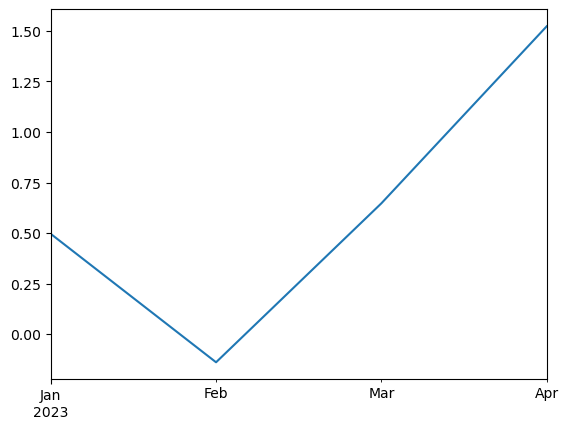

In [340]:
np.random.seed(42)
s = pd.Series(np.random.randn(4), index=idx)
s
s.plot()

In [344]:
# pd.date_range(start, end, 기가)을 이용하면 간단하게 생성가능
print(pd.date_range("2023-1-1", "2023-12-1", freq='D'))
print(pd.date_range("2023-1-1", "2023-12-1", freq='M'))
print(pd.date_range("2023-1-1", "2023-12-1", freq='Q'))
print(pd.date_range("2023-1-1", "2023-12-1", freq='Y'))

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-11-22', '2023-11-23', '2023-11-24', '2023-11-25',
               '2023-11-26', '2023-11-27', '2023-11-28', '2023-11-29',
               '2023-11-30', '2023-12-01'],
              dtype='datetime64[ns]', length=335, freq='D')
DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30'],
              dtype='datetime64[ns]', freq='M')
DatetimeIndex(['2023-03-31', '2023-06-30', '2023-09-30'], dtype='datetime64[ns]', freq='Q-DEC')
DatetimeIndex([], dtype='datetime64[ns]', freq='A-DEC')


In [345]:
# shift연산 - 에이칸 이동
np.random.seed(42)
ts = pd.Series(np.random.randn(4), index=pd.date_range("2023-1-1"
                                                       , periods=4, freq="M"))
ts

2023-01-31    0.496714
2023-02-28   -0.138264
2023-03-31    0.647689
2023-04-30    1.523030
Freq: M, dtype: float64

In [349]:
print(ts.shift(1))
print(ts.shift(-1))
print(ts.shift(1, freq="M"))

2023-01-31         NaN
2023-02-28    0.496714
2023-03-31   -0.138264
2023-04-30    0.647689
Freq: M, dtype: float64
2023-01-31   -0.138264
2023-02-28    0.647689
2023-03-31    1.523030
2023-04-30         NaN
Freq: M, dtype: float64
2023-02-28    0.496714
2023-03-31   -0.138264
2023-04-30    0.647689
2023-05-31    1.523030
Freq: M, dtype: float64


In [ ]:
# 실습1.
# 어느 회사의 전반기(1월 ~ 6월) 실적을 나타내는 
# 데이터프레임과 후반기(7월 ~ 12월) 실적을 나타내는 
# 데이터프레임을 만든 뒤 합친다. 실적 정보는 “매출”, “비용”, 
# “이익” 으로 이루어진다. (이익 = 매출 - 비용).
# 또한 1년간의 총 실적을 마지막 행으로 덧붙인다.

In [335]:
# 실습2. tips데이터를 기준으로 다양하게 pivot_table을 적용하기
# 남여 그룹, 흡연자/비흡연자, 인원수 등을 평균, 합계등...
import seaborn as sns
tips = sns.load_dataset("tips")
tips.tail()

# 팁의 비율이 요일과 점심/저녁 여부, 인원수에 어떤 영향을 받는지 살펴본다.
# 어떤 요인이 가장 크게 작용하는지 판단할 수 있는 방법이 있는가?

NameError: name 'sns' is not defined